### This is the base model notebook

In [19]:
from sklearn.ensemble import RandomForestRegressor

kaggle_location = "hassankhaled21/egyptian-real-estate-listings"
kaggle_filepath = "egypt_real_estate_listings.csv"
training_colum = "price"
columns_to_drop = ["url", "description"]
selected_model = RandomForestRegressor

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
import kaggle as kag
from kagglehub import KaggleDatasetAdapter
import kagglehub
from pprint import pprint

In [21]:
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  kaggle_location,
  kaggle_filepath,
)

/tmp/ipykernel_68827/928910658.py:1: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


In [22]:
df.head()

,url,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment
0,https://www.propertyfinder.eg/en/plp/buy/chale...,"8,000,000",OWN A CHALET IN EL GOUNA WITH A PRIME LOCATION...,"Swan Lake Gouna, Al Gouna, Hurghada, Red Sea",Chalet,732 sqft / 68 sqm,1+ Maid,1,31 Aug 2025,Cash,"1,200,000 EGP"
1,https://www.propertyfinder.eg/en/plp/buy/villa...,"25,000,000","For sale, a villa with immediate delivery in C...","Karmell, New Zayed City, Sheikh Zayed City, Giza",Villa,"2,368 sqft / 220 sqm",4,4,2 Sep 2025,Cash,"2,100,000 EGP"
2,https://www.propertyfinder.eg/en/plp/buy/chale...,"15,135,000","With a down payment of EGP 1,513,000, a fully ...","Azha North, Ras Al Hekma, North Coast",Chalet,"1,270 sqft / 118 sqm",2,2,19 Aug 2025,Cash,"1,513,000 EGP"
3,https://www.propertyfinder.eg/en/plp/buy/apart...,"12,652,000",Own an apartment in New Cairo with a minimal d...,"Taj City, 5th Settlement Compounds, The 5th Se...",Apartment,"1,787 sqft / 166 sqm",3,2,26 Aug 2025,Installments,"1,260,000 EGP"
4,https://www.propertyfinder.eg/en/plp/buy/villa...,"45,250,000",Project: Granville\nLocation: Fifth Settlement...,"Granville, New Capital City, Cairo",Villa,"4,306 sqft / 400 sqm",7,7,2 Sep 2025,Cash,"2,262,500 EGP"


In [23]:
columns_to_drop.append(training_colum)
X = df.drop(columns=columns_to_drop)
y = df[training_colum]

In [24]:
OHE = OrdinalEncoder()
X_encoded = OHE.fit_transform(X, y)

In [25]:
LE = LabelEncoder()
y_encoded = LE.fit_transform(y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.25, train_size=0.75, shuffle=True)

In [27]:
model = selected_model()
model.fit(X=X_train, y=y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
y_pred = model.predict(X_test)

In [30]:
mse = mean_absolute_error(y_test, y_pred)
print(f"MSE : {mse}")

MSE : 792.3527215572682


<Axes: >

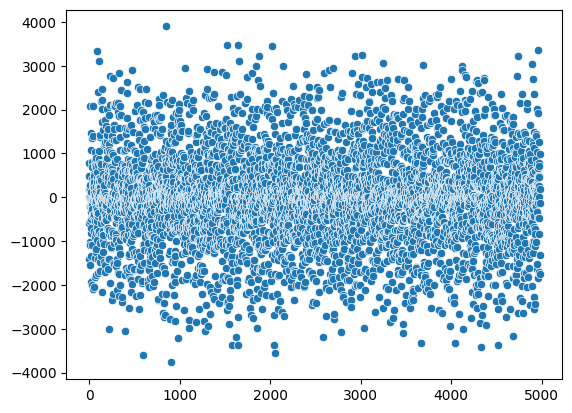

In [31]:
residuals = y_pred - y_test
sns.scatterplot(residuals)